In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from portfolio_env import BasicPortfolioEnv

In [2]:
# Parallel environments
vec_env = make_vec_env(BasicPortfolioEnv, n_envs=4)

model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=100_000)
model.save("basic_portfolio_rl_model")

Using cuda device
-----------------------------
| time/              |      |
|    fps             | 2280 |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 8192 |
-----------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 3.42e+03    |
|    ep_rew_mean          | 31.6        |
| time/                   |             |
|    fps                  | 1027        |
|    iterations           | 2           |
|    time_elapsed         | 15          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.024518156 |
|    clip_fraction        | 0.169       |
|    clip_range           | 0.2         |
|    entropy_loss         | -121        |
|    explained_variance   | -0.0084     |
|    learning_rate        | 0.0003      |
|    loss                 | 0.299       |
|    n_updates            | 10          |
|    policy_grad

In [3]:
env = BasicPortfolioEnv()
obs, _ = env.reset()

port_val = [1.0]
snp_val = [1.0]
actions = []

for i in range(1000):
    action, _ = model.predict(obs, deterministic=True)
    actions.append(action)
    obs, rewards, terminated, truncated, info = env.step(action)
    port_val.append(info['port_val'])
    snp_val.append(snp_val[-1] * (1 + env.idx_df[env.idx_df.index == env.times[env.t]].vwretd.values[0]))
    if terminated:
        break

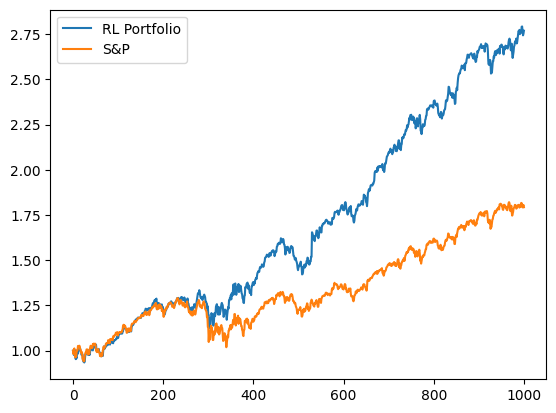

In [4]:
plt.plot(np.array(port_val), label='RL Portfolio')
plt.plot(np.array(snp_val), label='S&P')
# plt.yscale('log')
plt.legend()
plt.show()